In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns 
import warnings
from scipy import stats

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 1
}

plt.rc('axes', unicode_minus=False)
sns.set(rc=rc)
warnings.filterwarnings(action = 'ignore')

# **음이항 분포**




$X~NB(r,p)$


음이항 분포는 두가지 경우가 있다. 성공횟수와 성공 확률이 정해져있고, 시도 횟수가 모수가 되는 음이항 분포와


시도횟수와 성공확률이 정해져있고, 성공 횟수가 모수가 되는 음이항 분포


나는 강의에서 가르친 시도횟수가 모수가 되는 음이항 분포만 정리하고, 성공 횟수가 모수가 되는 음이항 분포의 경우는 유튜브를 올려두도록 하겠다.



음이항 분포는 기하 분포의 일반화 식으로 볼 수 있다


기하 분포가 성공확률이 p 은 베르누이 시행을 시도하였을 때 처음 성공하기 위한 시도 횟수들의 분포였다면


음이항 분포는 성공확률이 p 인 베르누이 시행을 시도 하였을 때 r 번 성공 할 때 까지 시도 횟수들의 분포이다.


기하분포는 음이항 분포에서 성공 횟수인 r 이 1인 분포를 의미하는 것이였다.


### **음이항 분포의 확률 질량 함수**



$P(X=x)=\binom{x-1}{r-1}p^rq^{x-r}$


음이항 분포에서 전체 시도 횟수는 실패 횟수 + 성공횟수 일 것이다.


음이항 분포에서 마지막 시도는 무조건 성공으로 끝나기 때문에


X-1 번의 시도 횟수에서 r-1 개의 성공이 존재해야하며 , r 번 성공할 확률 p^r 과 X-r 번 실패할 확률인 q^{x-r} 이 확률 값으로서 존재한다.


### **음이항 분포의 기댓값**


기하분포때처럼 기댓값의 선형성을 이용해서 쉽게 구할 수 있다.


r 번의 성공이 있을 때 첫 번째 성공까지를 xi 라고 해보자


만약 X 번의 시도에서 5번의 성공이 있을 때 까지의 시도횟수를 본다고 하면


계~속 실패하다가 마지막에 한 번 성공하는 확률변수인 x1 이 있고, 그 다음에 실패하다가 마지막에 성공하는 x2, 똑같이 x3,x4,x5 까지 있을 것이다.




$E\left(X\right)\ =E\left(x_1+x_2+x_3....+x_i\right)$


이 때 각 xi 는 기하분포를 따른다. (계속 시도하다가 마지막에 처음 성공할 확률의 분포)


기대값의 선형성에 따라 기대값은 이렇게 쓸 수 있다.



$E\left(x_1+x_2+x_3....+x_i\right)=E(x_1)+E(x_2)+....E(x_{_i})$


각 확률 변수 xi 를 따르니


기하분포의 기대값인 1/p 가 성공 횟수만큼 r 개 존재한다.


$E(x_1)+E(x_2)+....E(x_{_i})=\frac{1}{p}+\frac{1}{p}...+\frac{1}{p}$

$=r*\frac{1}{p}$​​

﻿

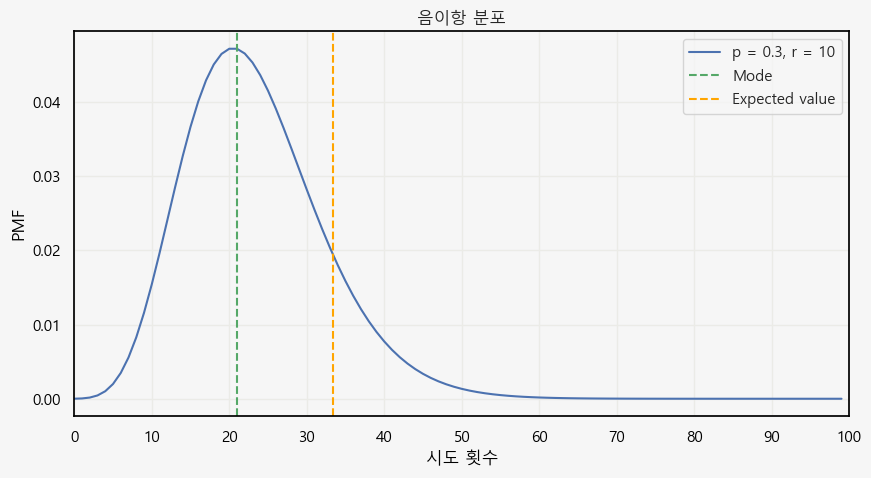

In [3]:
fig,ax = plt.subplots(figsize = (10,5))

x = range(100)
r = 10
p = 0.3

probs = stats.nbinom(r,p).pmf(x)

ax.plot(probs,
        label = f'p = {p}, r = {r}')
ax.set_title('음이항 분포')
ax.set_xlabel('시도 횟수')
ax.set_ylabel('PMF')
ax.set_xlim([0,100])
ax.axvline(x[np.argmax(probs)], c = 'g', ls = '--', label = 'Mode')
ax.axvline(r/p, c = 'orange', ls = '--', label = 'Expected value')
ax.set_xticks(range(0,101,10))
ax.legend();


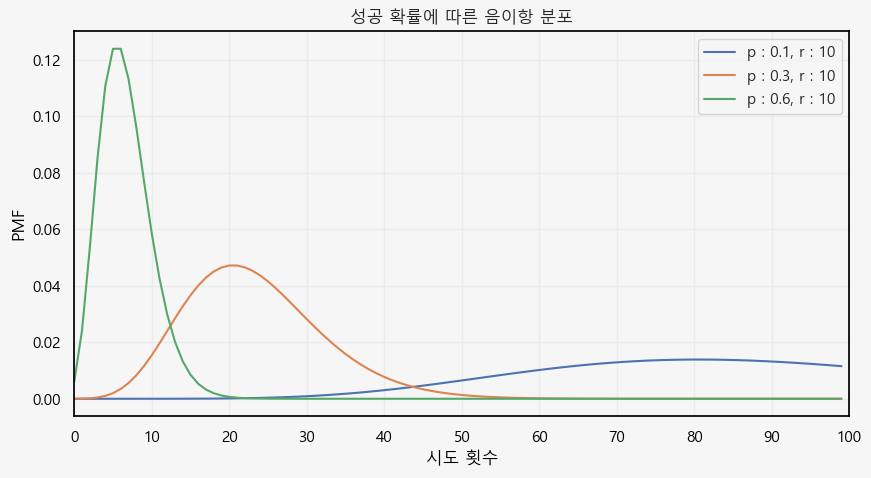

In [4]:
fig,ax = plt.subplots(figsize = (10,5))

x = range(100)
r = 10

for p in [0.1,0.3,0.6]:
    nbionm = stats.nbinom(r,p)
    probs = nbionm.pmf(x)
    ax.plot(probs, label = f'p : {p}, r : {r}')


ax.set_xlim([0,100])
ax.set_title('성공 확률에 따른 음이항 분포')
ax.set_xlabel('시도 횟수')
ax.set_ylabel('PMF')

ax.set_xticks(range(0,101,10))
ax.legend();



- 모양: 음이항분포는 일반적으로 오른쪽으로 치우쳐 있거나 양으로 치우친 모양을 나타낸다. 이는 분포의 꼬리가 오른쪽으로 확장됨을 의미합니다. 왜도는 분포가 고정된 성공 횟수에 도달할 때까지 다양한 시도 횟수를 허용한다는 사실에서 발생한다.

- 모드: 음이항 분포의 모드는 지정된 성공 횟수를 달성하는 데 필요한 가장 가능성 있는 시행 횟수를 나타낸다. 최빈값은 분포의 PMF(확률 질량 함수)를 최대화하는 X 값에서 발생한다.

- 점근적 행동: 음이항 분포는 무한히 확장되는 긴 오른쪽 꼬리를 가집니다. 이 꼬리는 지정된 성공 횟수를 달성하기 위해 점점 더 많은 시도가 필요할 가능성을 나타낸다. 그러나 시행 횟수가 증가함에 따라 이러한 발생 확률은 급격히 감소합니다.

- 기대값: 음이항 분포의 기대값 또는 평균은 지정된 성공 횟수를 달성하는 데 필요한 평균 시행 횟수를 나타낸다. 이것은 r/p와 같습니다. 여기서 r은 성공 횟수이고 p는 단일 시도에서 성공할 확률이다.


﻿

# **상테르부르크 역설**


상트페테르부르크 패러독스는 러시아 상트페테르부르크의 도시 이름을 딴 확률론과 결정론의 유명한 역설이다. 무한한 기대 가치의 가치에 대해 의문을 제기하는 가상의 도박 게임을 포함한다.


다음은 St. Petersburg Paradox에 대한 간단한 설명이다.


게임에서 플레이어는 참가비를 지불한다. 공정한 동전은 처음으로 뒷면이 나올 때까지 반복해서 뒤집는다. 플레이어는 필요한 뒤집기 횟수에 따라 금전적 지불금을 받는다. 구체적으로, 지불금은 첫 번째 헤드에 대해 $2부터 시작하여 각 연속 헤드에 대해 두 배가 된다.


예를 들어, 첫 번째 플립에서 첫 번째 앞면이 나타나면 플레이어는 $2를 받는다. 두 번째 플립에 나타나면 플레이어는 $4를 받는다. 세 번째 뒤집기에 나타나면 플레이어는 8달러를 받는다. 참가자가 처음 실패 할 때 까지 프로세스는 계속 된다

Text(0.5, 1.0, '성공 횟수에 따라 참가자가 받을 수 있는 금액')

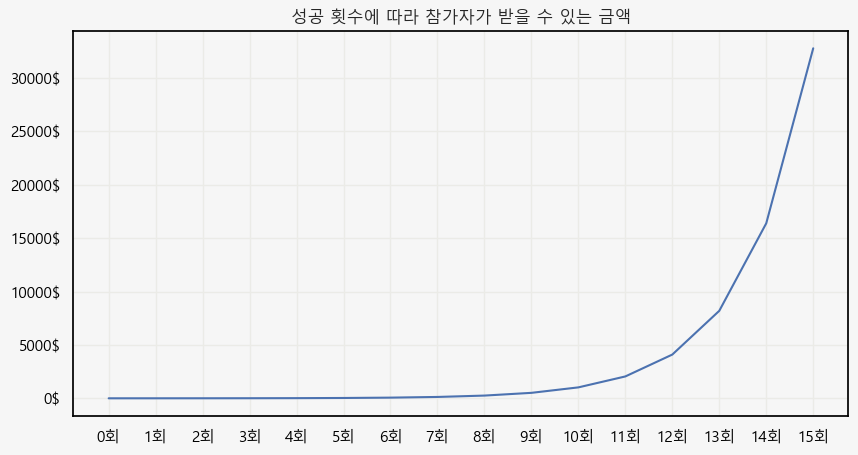

In [25]:
fig,ax = plt.subplots(figsize = (10,5))

ax.plot(
    [2**i for i in range(16)]
)

ax.set_yticklabels([str(int(_)) + '$' for _ in ax.get_yticks()])
ax.set_xticks(range(16))
ax.set_xticklabels([str(int(_)) + '회' for _ in ax.get_xticks()]);

ax.set_title('성공 횟수에 따라 참가자가 받을 수 있는 금액')

해당 시행은 동전 던지기이기 때문에 매 시행 당 성공할 확률은 1/2 이다.

그리고 사회자가 받을 수 있는 금액은 2^i 로 

해당 시행의 기대값은 다음과 같다.

$E(X) = \sum_{i=0}^\infin 2^i * (\frac{1}{2})^i \\
 = \sum_{i=0}^\infin 2^i * 2^{-i} \\
 = \sum_{i=0}^\infin 1 \\
 = \infin$


 만일 사회자가 참가자가 몇 판을 이기든 돈을 얼마든지 주겠다고 한다면 참가자가 얻을 수 있는 금액의 기대값은 무한대로 발산한다 .

하지만 만약 사회자가 참가자가 n 판 이하까지만 인정해주고 n 판 이상 이기면 게임을 멈추고 돈을 지급하겠다고 한다면 기대값은 어떻게 될까.

예를 들어 약 40판만 이겨도 게임을 멈추겠다고 해보자 

40판만 이겨도 1조원이 훌쩍 넘는 금액이다.

</br>
 
> $E(X) = \sum_{i=0}^{40} 2^i * (\frac{1}{2})^i \\
 = \sum_{i=0}^{40} 2^i * 2^{-i} \\
 = \sum_{i=0}^{40} 1 \\
 = 40$ $


</br>


 게임을 시행하면 사회자가 얻을 수 있는 금액의 기대값은 약 40$ 가 된다. 

 그럼 만약, 참가자한테 참가비가 40$ 이니 시도해보겠냐고 물어본다면, 참가하겠다는 참가자보다 참가를 안하겠다는 참가자가 더 많을 것이다.

 혹은 만약에, 사회자가 제한을 주지 않고 언제든지 이기기만 하면 모든 금액을 주겠다며 참가비를 1000$를 부른다면 ? 

 무한한 금액이 기대값이지만, 사실 기대 가치와 참가비 사이에서 사람은 갈등을 겪고 대부분 높은 금액을 지불할 의향이 없을 것이다.

 이는 모든 사람이 결정을 내릴 때 꼭 기대값으로만 결정을 하는 것이 아니라, 다양한 요소를 통해 의사결정이 일어나는 것이라는 교훈을 준다.